In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning/Wine.csv'
path

'/content/drive/MyDrive/Colab Notebooks/Deep Learning/Wine.csv'

In [4]:
df = pd.read_csv(path)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [7]:
#checking duplicate values

df.duplicated().sum()

0

In [8]:
x = df.drop('Customer_Segment', axis=1)
y = df['Customer_Segment']

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1,stratify=y)

In [10]:
[x_train.shape, x_test.shape]

[(124, 13), (54, 13)]

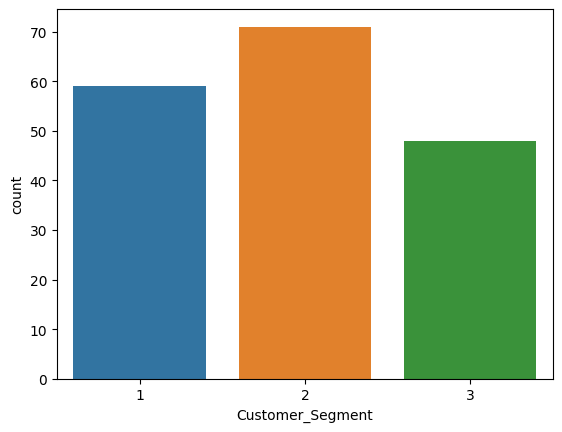

In [11]:
sns.countplot(data=df,x='Customer_Segment')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

x_train = std_scale.fit_transform(x_train)
x_test = std_scale.transform(x_test)

In [35]:
# creating Architecture for Neural networl

# creating Architecture for Neural networl
import tensorflow as tf
#create a object of sequential class
model=tf.keras.Sequential([
  tf.keras.layers.Dense(units=13,activation='relu',input_dim=13),
  #first hidden layer #input_shape(X.shape[1],) or input_dim=no. of input
  tf.keras.layers.Dense(units=13,activation='relu'),#second hidden layer
  tf.keras.layers.Dense(units=13,activation='softmax') #classification = softmax
  #here unit 3 as multiclassClassifier
  #last is output layer 3rd layer
])

In [36]:
#to show model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 13)                182       
                                                                 
 dense_13 (Dense)            (None, 13)                182       
                                                                 
 dense_14 (Dense)            (None, 13)                182       
                                                                 
Total params: 546
Trainable params: 546
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#adam means adagrad+RMS propotional
#adagrad means momentum
#and rms propotional means direction

In [38]:
#create a procedure for callback(Earlystopping)
#Early Stopping :
#EarlyStopping : for decide epoch
#create a procedure for callback
from tensorflow.keras.callbacks import EarlyStopping
#create callback : -
#EarlyStopping() inbuilt function
cb=EarlyStopping(
    monitor="val_loss",  #val_loss means testing error
    min_delta=0.00001, #value of lambda
    patience=20,
    verbose=1,
    mode="auto", #min loss
    baseline=None,
    restore_best_weights=False
)

In [39]:
#train the model
trained_model=model.fit(x_train,y_train,epochs=4000,batch_size=5,validation_data=(x_test,y_test),callbacks=cb)

Epoch 1/4000
25/25 [==============================] - 2s 17ms/step - loss: 2.6431 - accuracy: 0.1129 - val_loss: 2.5355 - val_accuracy: 0.1481
Epoch 2/4000
25/25 [==============================] - 0s 4ms/step - loss: 2.3992 - accuracy: 0.3226 - val_loss: 2.3239 - val_accuracy: 0.3889
Epoch 3/4000
25/25 [==============================] - 0s 5ms/step - loss: 2.1530 - accuracy: 0.5081 - val_loss: 2.0723 - val_accuracy: 0.6111
Epoch 4/4000
25/25 [==============================] - 0s 4ms/step - loss: 1.8545 - accuracy: 0.6935 - val_loss: 1.7721 - val_accuracy: 0.7593
Epoch 5/4000
25/25 [==============================] - 0s 4ms/step - loss: 1.4968 - accuracy: 0.8952 - val_loss: 1.4223 - val_accuracy: 0.7593
Epoch 6/4000
25/25 [==============================] - 0s 4ms/step - loss: 1.1107 - accuracy: 0.9113 - val_loss: 1.0731 - val_accuracy: 0.7778
Epoch 7/4000
25/25 [==============================] - 0s 4ms/step - loss: 0.7735 - accuracy: 0.9194 - val_loss: 0.8018 - val_accuracy: 0.8519
Epoch

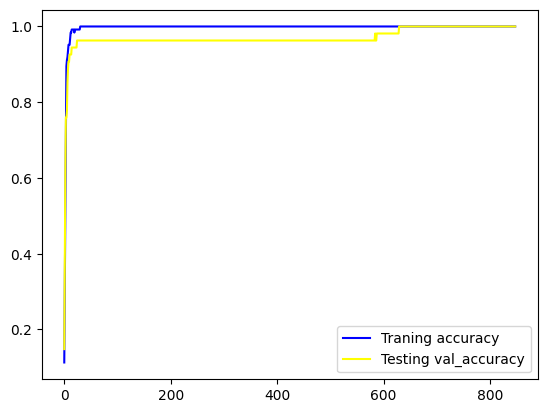

In [40]:
#visualise the loss(training loss) and val_loss(testing loss)
plt.plot(trained_model.history['accuracy'],color='blue',label='Traning accuracy')
plt.plot(trained_model.history['val_accuracy'],color='yellow',label='Testing val_accuracy')
plt.legend()
plt.show()

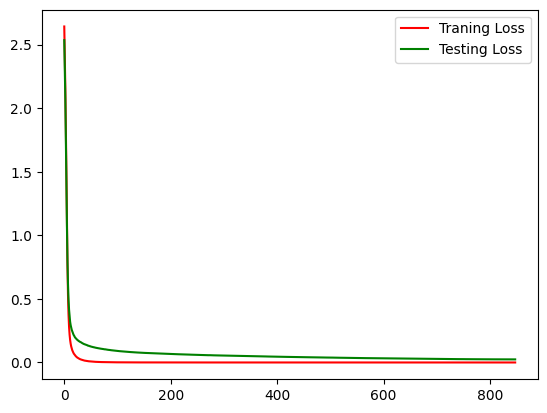

In [41]:
#visualise the loss(training loss) and val_loss(testing loss)
plt.plot(trained_model.history['loss'],color='red',label='Traning Loss')
plt.plot(trained_model.history['val_loss'],color='green',label='Testing Loss')
plt.legend()
plt.show()